In [101]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_excel("C:/Users/ddesai31/Desktop/Applied Statistics and Regression/loan_data_final.xlsx")

In [102]:
df=df.head(100)
df

,InterestRate,log_annual_inc,fico,revol_balance,installment
0,0.1189,11.350407,737,28854,829.10
1,0.1071,11.082143,707,33623,228.22
2,0.1357,10.373491,682,3511,366.86
3,0.1008,11.350407,712,33667,162.34
4,0.1426,11.299732,667,4740,102.92
...,...,...,...,...,...
95,0.0775,10.714418,762,1359,156.11
96,0.1154,12.323856,727,107501,329.95
97,0.0807,12.061047,787,3054,313.67
98,0.0807,11.407565,792,40384,297.99


In [104]:
df.columns

Index(['InterestRate', 'log_annual_inc', 'fico', 'revol_balance',
       'installment'],
      dtype='object')

In [105]:
import plotly.express as px
fig = px.scatter_matrix(df,dimensions=df.columns)
fig.show()

In [10]:
df.corr().round(6)

,InterestRate,log_annual_inc,fico,revol_balance,installment
InterestRate,1.000000,-0.212034,-0.849058,0.029348,0.265648
log_annual_inc,-0.212034,1.000000,0.269451,0.405284,0.086312
fico,-0.849058,0.269451,1.000000,0.097222,0.004488
revol_balance,0.029348,0.405284,0.097222,1.000000,0.133486
installment,0.265648,0.086312,0.004488,0.133486,1.000000


In [106]:
atr=['log_annual_inc','fico','revol_balance','installment']
response=['InterestRate']

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=df[atr]
y=df[response]
model.fit(x, y)
fitted_value = model.predict(x)
print(fitted_value) #yhat values
print(model.coef_)
print(model.intercept_)

[[0.11956244]
 [0.111201  ]
 [0.12542198]
 [0.10618236]
 [0.12095297]
 [0.09908201]
 [0.12509827]
 [0.10024949]
 [0.11990624]
 [0.10443064]
 [0.12827403]
 [0.12800061]
 [0.08579615]
 [0.08511517]
 [0.10144145]
 [0.1148654 ]
 [0.1187097 ]
 [0.0778073 ]
 [0.12066449]
 [0.12361354]
 [0.08070435]
 [0.07868222]
 [0.13320223]
 [0.08538701]
 [0.12689856]
 [0.10264554]
 [0.06386918]
 [0.13063433]
 [0.07551689]
 [0.06593429]
 [0.09032169]
 [0.11899332]
 [0.07402342]
 [0.07828991]
 [0.089638  ]
 [0.07664123]
 [0.06991112]
 [0.12321279]
 [0.10864293]
 [0.10539648]
 [0.09246923]
 [0.07456939]
 [0.08507504]
 [0.11460098]
 [0.11042172]
 [0.06680653]
 [0.08486061]
 [0.07851688]
 [0.10092907]
 [0.06828227]
 [0.0731682 ]
 [0.11093561]
 [0.10634409]
 [0.10404924]
 [0.13862093]
 [0.09858191]
 [0.12246215]
 [0.13846359]
 [0.12926586]
 [0.10537972]
 [0.12634686]
 [0.07778697]
 [0.11652677]
 [0.12163408]
 [0.0839155 ]
 [0.11081877]
 [0.10717632]
 [0.1042812 ]
 [0.11517616]
 [0.0840246 ]
 [0.05931512]
 [0.08

In [16]:
import statsmodels.api as sm

X = sm.add_constant(x) # for beta0 consideration
model = sm.OLS(y,X)
results = model.fit()
results.params

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           InterestRate   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     95.61
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.93e-32
Time:                        18:40:54   Log-Likelihood:                 315.91
No. Observations:                 100   AIC:                            -621.8
Df Residuals:                      95   BIC:                            -608.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4247      0.022     19.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [18]:
vif

,VIF Factor,features
0,191.672667,log_annual_inc
1,184.485442,fico
2,1.729363,revol_balance
3,3.043417,installment


In [19]:
from statsmodels.formula.api import ols
model = ols('InterestRate ~ log_annual_inc+fico+revol_balance+installment', data=df).fit()


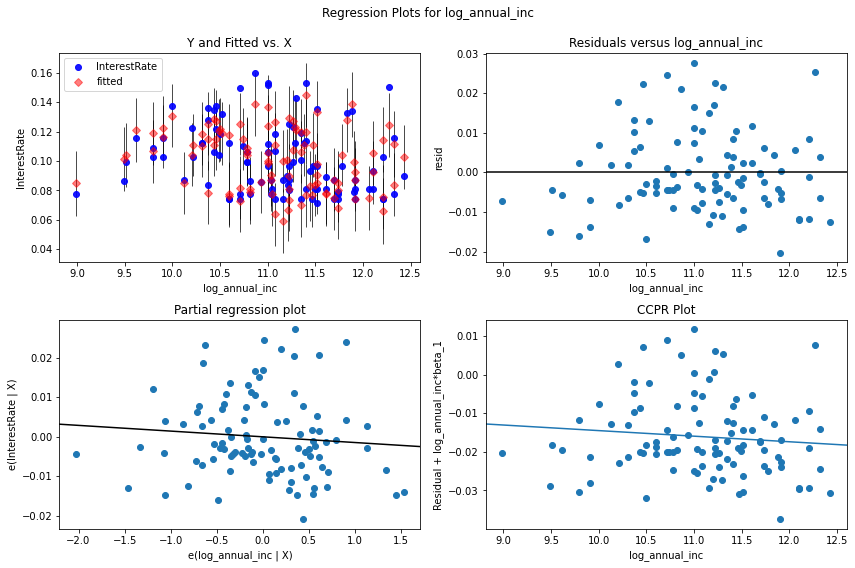

In [20]:
import statsmodels.api as sm
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8)) 
fig = sm.graphics.plot_regress_exog(model, 'log_annual_inc', fig=fig) 

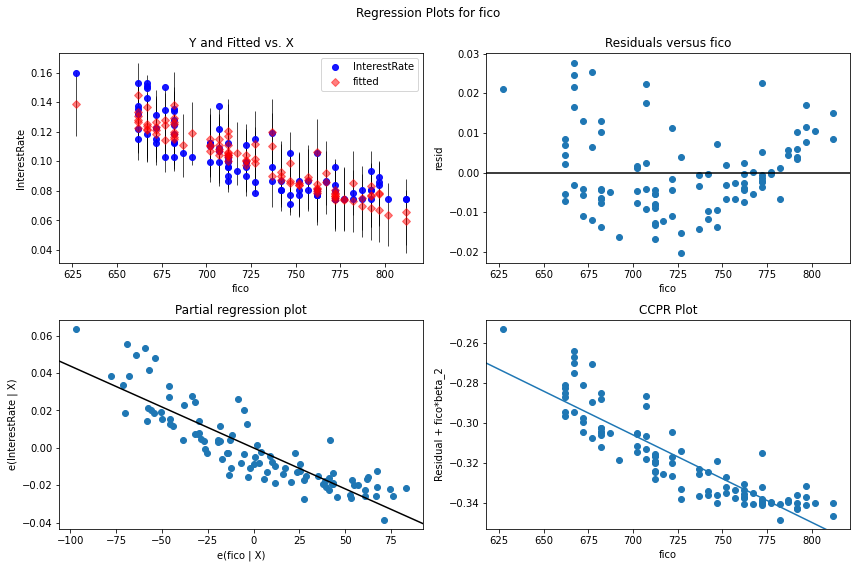

In [21]:
import statsmodels.api as sm
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'fico', fig=fig) 

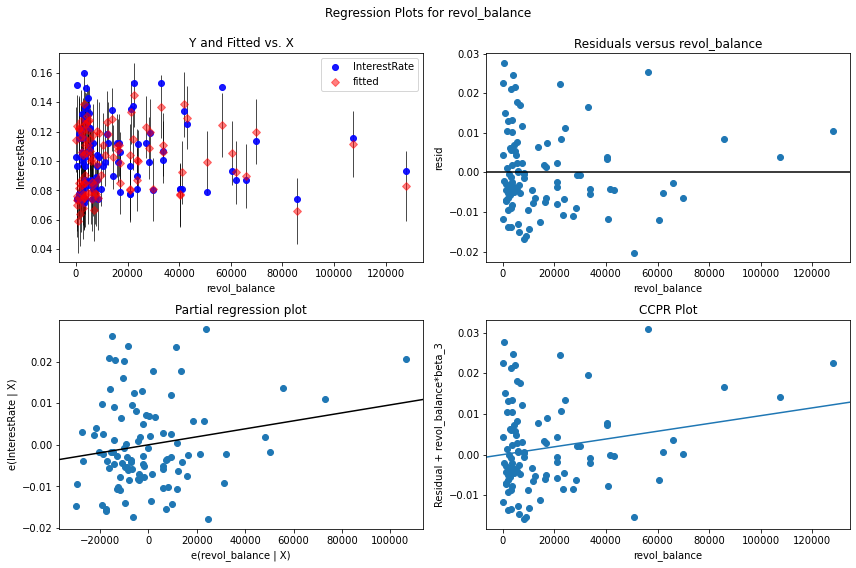

In [22]:
import statsmodels.api as sm
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'revol_balance', fig=fig)

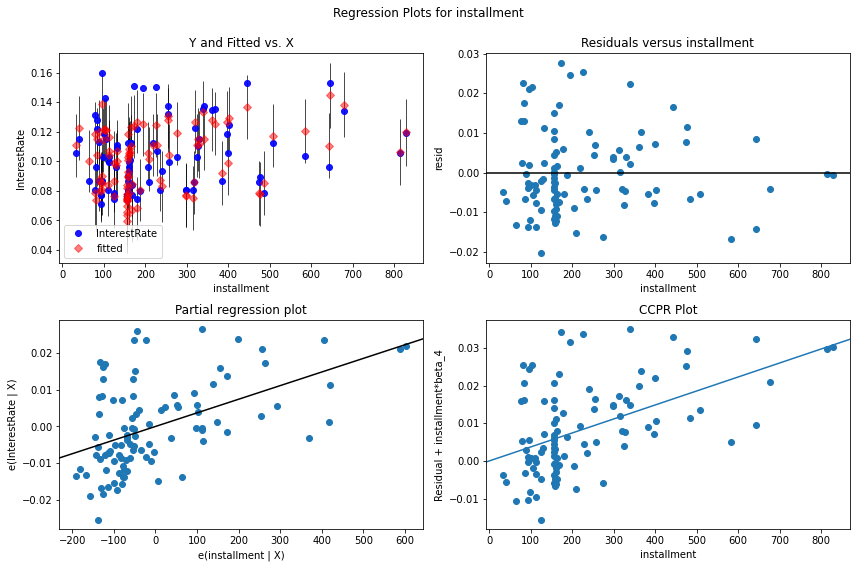

In [23]:
import statsmodels.api as sm
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'installment', fig=fig)

In [26]:
residual=y-fitted_value
residual

,InterestRate
0,-0.000662
1,-0.004101
2,0.010278
3,-0.005382
4,0.021647
...,...
95,-0.004402
96,0.003872
97,0.005662
98,0.003904


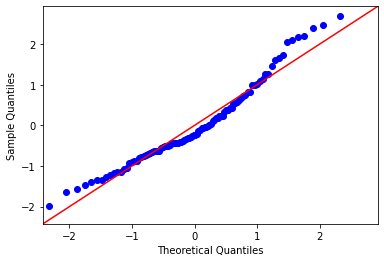

In [27]:
res = model.resid 
fig = sm.qqplot(res,fit=True, line="45")
plt.show()

In [28]:
from statsmodels.formula.api import ols
model=ols('InterestRate ~ log_annual_inc+fico+revol_balance+installment',data=df).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
log_annual_inc,1.0,0.002385,0.002385,21.464222,1.145305e-05
fico,1.0,0.035880,0.035880,322.853501,2.569602e-32
revol_balance,1.0,0.000701,0.000701,6.305180,1.372722e-02
installment,1.0,0.003534,0.003534,31.799362,1.752276e-07
Residual,95.0,0.010558,0.000111,NaN,NaN


Text(0, 0.5, 'residual')

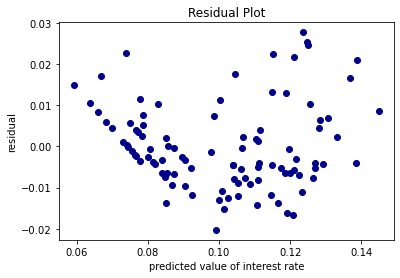

In [30]:
plt.plot(fitted_value,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("predicted value of interest rate")
plt.ylabel("residual")


In [31]:
from statsmodels.formula.api import ols

m = ols('InterestRate ~ log_annual_inc+fico+revol_balance+installment',df).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()

In [32]:
sm_fr

,dfb_Intercept,dfb_log_annual_inc,dfb_fico,dfb_revol_balance,dfb_installment,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.002735,-0.000006,-0.001527,-0.000008,-0.027056,0.000162,-0.068115,0.148935,-0.028495,-0.067758,-0.028345
1,-0.021579,0.007551,0.017675,-0.031324,0.003677,0.000578,-0.392645,0.018394,-0.053749,-0.390891,-0.053509
2,0.114893,-0.064596,-0.075359,-0.032423,0.097368,0.007224,0.992673,0.035361,0.190058,0.992596,0.190044
3,-0.012083,-0.011446,0.023202,-0.035093,0.026973,0.001088,-0.515758,0.020032,-0.073740,-0.513756,-0.073453
4,0.115174,0.210483,-0.327490,-0.144293,-0.165516,0.040545,2.100082,0.043946,0.450251,2.139247,0.458647
...,...,...,...,...,...,...,...,...,...,...,...
95,0.011985,0.020374,-0.040699,0.020116,0.014079,0.000943,-0.423027,0.025665,-0.068657,-0.421192,-0.068359
96,0.001634,0.011172,-0.018909,0.155268,0.003952,0.006628,0.403032,0.169443,0.182040,0.401248,0.181235
97,-0.112338,0.082117,0.057570,-0.075096,0.032593,0.003824,0.553640,0.058721,0.138282,0.551609,0.137775
98,-0.033936,-0.012277,0.054260,0.034412,0.012444,0.001233,0.378250,0.041314,0.078521,0.376537,0.078166


In [33]:
p=5
n=100
x_outlier_cutoff= (2*p)/n
x_outlier_cutoff


0.1

In [39]:
max(sm_fr['hat_diag'])

0.2957437781861241

In [40]:
x_outliers=sm_fr['hat_diag']>0.1

In [50]:
import numpy as np
np.where(x_outliers)[0]

array([ 0, 29, 46, 52, 57, 88, 96, 99], dtype=int64)

In [88]:
#import scipy as sc
#y_outlier_cutoff=sc.stats.ttest_ind(0.99,94, axis=0, equal_var=True,)

In [61]:
#y_outlier_cutoff

Ttest_indResult(statistic=nan, pvalue=nan)

In [113]:
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
from scipy import stats
model= LinearRegression().fit(x,y)

In [114]:
df['yhat']=model.predict(x)
df['res']= df['InterestRate']-df['yhat']

group2=df[df.fico>700]
group1=df[df.fico<=700]
stat, p = stats.levene(group1['res'], group2['res'],center='median')

In [115]:
p

0.012372694379768288

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random
import math
rsq=0.801
rsq


0.801

In [121]:
rvalue=math.sqrt(rsq)
rvalue

0.8949860334105779

In [126]:
cvalue=0.989


In [127]:

if rvalue < cvalue :
        
        print("normality assumption is violated")
else :
            print("normality satisfied")

normality assumption is violated
